In [1]:
import numpy as np
from numpy import *
import cv2
import glob 
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [3]:
label = []


In [4]:
path1 ='./dataset/PreprocessedImages/Images/'
path2 = './dataset/ReadyToTrain/Images/'

In [5]:
def listImages(directory):
    filelist = os.listdir(directory)
    return [x for x in filelist
            if not (x.startswith('.'))]

In [6]:
rootDir = './dataset/cohn-kanade-images';
for dirs in os.walk(rootDir):
    #print(sub_directory[1])
    for i in dirs[1]:
         for sub_directory in os.walk(rootDir+'/'+i):
            #print(sub_directory)
            for j in sub_directory[1]:
                #print(j)
               
              
              
                if os.path.exists('./Emotion_labels/Emotion'+'/'+i+ '/'+ j) == True :
                    Images = listImages(rootDir+'/'+i+ '/'+ j);
                    #Images = os.listdir(rootDir+'/'+i+ '/'+ j);
                    for k, filename in enumerate(os.listdir('./Emotion_labels/Emotion'+'/'+i+ '/'+ j)):
                        #first k is .DS_store
                        if filename.endswith(".txt"):
                            with open('./Emotion_labels/Emotion'+'/'+i+ '/'+ j +'/'+ filename) as f:
                   
                                lines = f.readlines()
                                for line in lines:
                                    image_label= int(line.split('.')[0]);
                                 
                            f.close()
                            ImageGroup = [];
                            im = Image.open(rootDir+'/'+i+ '/'+ j + '\\' + Images[0])   
                            #gray = im.convert('L')
                            #gray.save(path1 +'\\' +  Images[0], "JPEG")
                            ImageGroup.append(rootDir+'/'+i+ '/'+ j + '\\' + Images[0]);
                        
                            im = Image.open(rootDir+'/'+i+ '/'+ j  + '\\' + Images[1])   
                            #gray = im.convert('L')
                            #gray.save(path1 +'\\' + Images[1], "JPEG")
                            ImageGroup.append(rootDir+'/'+i+ '/'+ j  + '\\' + Images[1]);

                            im = Image.open(rootDir+'/'+i+ '/'+ j  + '\\' + Images[len(Images)-1])   
                            #gray = im.convert('L')
                            #gray.save(path1 +'\\' +  Images[len(Images)-1], "JPEG")
                            ImageGroup.append(rootDir+'/'+i+ '/'+ j  + '\\' + Images[len(Images)-1]);

                            im = Image.open(rootDir+'/'+i+ '/'+ j  + '\\' + Images[len(Images)-2])   
                            #gray = im.convert('L')
                            #gray.save(path1 +'\\' +  Images[len(Images)-2], "JPEG")
                            ImageGroup.append(rootDir+'/'+i+ '/'+ j  + '\\' + Images[len(Images)-2]);
                
                            im = Image.open(rootDir+'/'+i+ '/'+ j  + '\\' + Images[len(Images)-3])   
                            #gray = im.convert('L')
                            #gray.save(path1 +'\\' +  Images[len(Images)-3], "JPEG")
                            ImageGroup.append(rootDir+'/'+i+ '/'+ j  + '\\' + Images[len(Images)-3]);
     
                            for image in ImageGroup:
                            
                                img = cv2.imread(image)
                                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                                faces = face_cascade.detectMultiScale(gray, 1.3, 5)
                                for (x,y,w,h) in faces:
                                    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
                                    roi_gray = gray[y:y+h, x:x+w]
                                    roi_color = img[y:y+h, x:x+w]
                                    cropped = img[y:y+h, x:x+w]    # To crop the image to get ROI.
        
                                #eyes = eye_cascade.detectMultiScale(roi_gray)
                                #for (ex,ey,ew,eh) in eyes:
                                #  cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
                                img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
                                img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
                                hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
                                #print(image.split("\\"));
                                cv2.imwrite(path1+image.split("\\")[1],cropped)
    
    
                
                
                
                
                            label.append(0);
                            label.append(0);
                            label.append(image_label);
                            label.append(image_label);
                            label.append(image_label);
                
                

In [7]:
len(label)

1635

In [8]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras import optimizers
import pandas as pd
import numpy as np
from skimage import exposure

Using TensorFlow backend.


In [9]:
config = tf.ConfigProto()  #, device_count= {'GPU' : 1, 'CPU': 50}
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = tf.Session(config=config)
keras.backend.set_session(session)

In [10]:
from keras import backend as K
K.set_image_dim_ordering('tf')


In [11]:
import os
from PIL import Image

In [12]:
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils


# input image dimensions
img_rows, img_cols = 200, 200

# number of channels
img_channels = 1


C:\Users\Varsha\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
listing = os.listdir(path1) 
num_samples=size(listing)
print(num_samples)

1635


In [14]:
for file in listing:
    im = Image.open(path1 + '\\' + file) 
    img = im.resize((img_rows,img_cols))
    
   
    #need to do some more processing here    
    gray = img.convert('L')
    gray.save(path2 +'\\' +  file, "JPEG")


In [18]:
imlist = os.listdir(path2)
im1 = array(Image.open(path2 + '\\'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images
print(m)
print(n)
print(imnbr)

200
200
1635


In [19]:
# create matrix to store all flattened images
immatrix = array([array(Image.open(path2+ '\\' + im2)).flatten()
              for im2 in imlist],'f')

In [20]:
img_data_list=[]
img_list=os.listdir(path2)
for img in img_list:
    input_img=cv2.imread(path2 + '\\'+ img )
   
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_resize=cv2.resize(input_img,(200,200))
    img_data_list.append(input_img_resize)
    

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255




print (img_data.shape)


(1635, 200, 200)


In [21]:
num_channel=1

In [22]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		
#%%
USE_SKLEARN_PREPROCESSING=False

(1635, 200, 200, 1)


C:\Users\Varsha\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [26]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 8
# number of epochs to train
nb_epoch = 20

In [27]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(label, nb_classes)
print(Y[2]);
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

#%%
# Defining the model
input_shape=img_data[0].shape
print(input_shape);
print(Y.shape);

[0. 0. 0. 1. 0. 0. 0. 0.]
(200, 200, 1)
(1635, 8)


In [28]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 3
# convolution kernel size
nb_conv = 3

In [29]:
# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
#plt.imshow(X_test[1])
#plt.show()
print(X_test);

[[[[0.07058824]
   [0.17254902]
   [0.11764706]
   ...
   [0.10588235]
   [0.16078432]
   [0.07843138]]

  [[0.11764706]
   [0.24313726]
   [0.21176471]
   ...
   [0.3372549 ]
   [0.3254902 ]
   [0.17254902]]

  [[0.11372549]
   [0.26666668]
   [0.2627451 ]
   ...
   [0.39215687]
   [0.3372549 ]
   [0.11764706]]

  ...

  [[0.12156863]
   [0.24705882]
   [0.26666668]
   ...
   [0.3529412 ]
   [0.3137255 ]
   [0.11372549]]

  [[0.16862746]
   [0.26666668]
   [0.25882354]
   ...
   [0.32941177]
   [0.3254902 ]
   [0.16470589]]

  [[0.07450981]
   [0.14901961]
   [0.10980392]
   ...
   [0.10980392]
   [0.16470589]
   [0.0627451 ]]]


 [[[0.04313726]
   [0.15686275]
   [0.11372549]
   ...
   [0.05490196]
   [0.19215687]
   [0.05490196]]

  [[0.15686275]
   [0.30980393]
   [0.30588236]
   ...
   [0.41960785]
   [0.4509804 ]
   [0.17254902]]

  [[0.11764706]
   [0.30980393]
   [0.34509805]
   ...
   [0.42745098]
   [0.43137255]
   [0.06666667]]

  ...

  [[0.10196079]
   [0.07450981]
   [0.0

In [30]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [31]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_train[1])

X_train shape: (1308, 200, 200, 1)
1308 train samples
327 test samples
[[[0.11372549]
  [0.09411765]
  [0.11764706]
  ...
  [0.11372549]
  [0.12156863]
  [0.10196079]]

 [[0.11372549]
  [0.10980392]
  [0.15294118]
  ...
  [0.12941177]
  [0.12941177]
  [0.08627451]]

 [[0.10980392]
  [0.1254902 ]
  [0.19215687]
  ...
  [0.23921569]
  [0.22745098]
  [0.14509805]]

 ...

 [[0.10980392]
  [0.09803922]
  [0.08235294]
  ...
  [0.20392157]
  [0.19607843]
  [0.12941177]]

 [[0.10588235]
  [0.09019608]
  [0.07843138]
  ...
  [0.19215687]
  [0.1882353 ]
  [0.12156863]]

 [[0.12941177]
  [0.11764706]
  [0.10588235]
  ...
  [0.14117648]
  [0.14117648]
  [0.07843138]]]


In [32]:
model = Sequential()
model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

C:\Users\Varsha\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., padding="same")`
  
C:\Users\Varsha\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  after removing the cwd from sys.path.


In [33]:
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


C:\Users\Varsha\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  """Entry point for launching an IPython kernel.
C:\Users\Varsha\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [35]:
#sgd = optimizers.SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
adam = keras.optimizers.Adam(lr=0.5)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

#model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])
#model.compile(loss='mean_squared_error', optimizer=sgd,metrics=["accuracy"])


In [36]:
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 198, 198, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 97, 97, 64)        0         
__________

True

In [ ]:
#%%
#from keras.callbacks import ModelCheckpoint
#from keras.callbacks import ModelCheckpoint
# save best weights
#checkpointer = ModelCheckpoint(filepath='face_model.h5', verbose=1, save_best_only=True)

nb_epoch=10

# Training
hist = model.fit(X_train, y_train, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test),  shuffle=True)

#hist = model.fit(X_train, y_train, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))



Train on 1308 samples, validate on 327 samples
Epoch 1/10
1308/1308 [==============================] - 738s 564ms/step - loss: 14.0790 - acc: 0.1032 - val_loss: 14.3436 - val_acc: 0.1101
Epoch 2/10
1308/1308 [==============================] - 491s 375ms/step - loss: 14.3806 - acc: 0.1078 - val_loss: 14.3436 - val_acc: 0.1101
Epoch 3/10
1308/1308 [==============================] - 495s 378ms/step - loss: 14.3806 - acc: 0.1078 - val_loss: 14.3436 - val_acc: 0.1101
Epoch 4/10
1308/1308 [==============================] - 497s 380ms/step - loss: 14.3806 - acc: 0.1078 - val_loss: 14.3436 - val_acc: 0.1101
Epoch 5/10
1308/1308 [==============================] - 499s 381ms/step - loss: 14.3806 - acc: 0.1078 - val_loss: 14.3436 - val_acc: 0.1101
Epoch 6/10
1308/1308 [==============================] - 495s 379ms/step - loss: 14.3806 - acc: 0.1078 - val_loss: 14.3436 - val_acc: 0.1101
Epoch 7/10
1308/1308 [==============================] - 485s 371ms/step - loss: 14.3806 - acc: 0.1078 - val_loss:

In [32]:
model.save('EmotionRecognitionCK+D5.model')


In [52]:
from sklearn.metrics import confusion_matrix

In [44]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

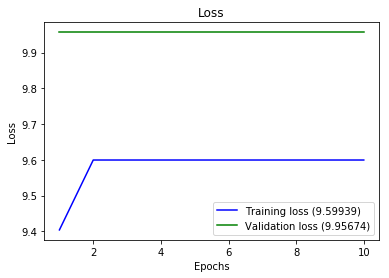

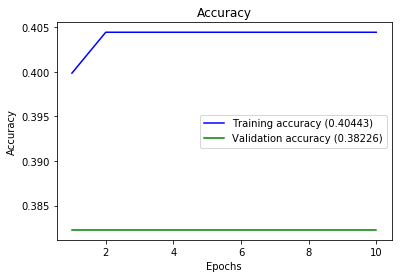

In [45]:
plot_history(hist);

In [47]:
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

In [39]:
new_model = tf.keras.models.load_model('EmotionRecognitionCK+D2.model')

(16, 200, 200)
[[0.5568628  0.56078434 0.5686275  ... 0.4509804  0.44705883 0.44313726]
 [0.5568628  0.5647059  0.57254905 ... 0.4509804  0.44705883 0.44705883]
 [0.5647059  0.5686275  0.5764706  ... 0.45882353 0.45490196 0.4509804 ]
 ...
 [0.38431373 0.39215687 0.30980393 ... 0.07843138 0.07058824 0.07843138]
 [0.30588236 0.34509805 0.23529412 ... 0.07450981 0.06666667 0.07450981]
 [0.2509804  0.3254902  0.19607843 ... 0.07058824 0.05882353 0.07058824]]


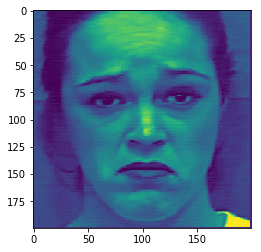

C:\Users\Varsha\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [40]:
imlist_test = os.listdir(path2+'\\'+'test')

img_data_list=[]
for img in imlist_test:
    input_img=cv2.imread(path2 + '\\'+ 'test'+ '\\' + img )
   
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_resize=cv2.resize(input_img,(200,200))
    img_data_list.append(input_img_resize)

#img_data = np.array(array([array(Image.open(path2 + '\\'+'test'+'\\'+ imlist[0]))]))
img_data = np.array(img_data_list);
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)
print(img_data[0])

plt.imshow(img_data[10])
plt.show()
img_data= np.expand_dims(img_data, axis=4) 
predictions=new_model.predict(img_data)

In [43]:
print(np.argmax(predictions[1]))


4


In [58]:
predictions=new_model.predict(X_test)

In [59]:
y_pred = [np.argmax(y, axis=None, out=None) for y in predictions]
y_true = [np.argmax(y, axis=None, out=None) for y in y_test]

print(len(y_true))
print(len(y_pred))


327
327


In [60]:
cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

array([[117,   3,   1,   2,   1,   0,   0,   1],
       [  0,  25,   0,   0,   0,   0,   0,   0],
       [  1,   0,   3,   0,   0,   0,   0,   1],
       [  0,   0,   0,  36,   0,   0,   0,   0],
       [  0,   0,   0,   0,  20,   0,   0,   0],
       [  0,   0,   0,   0,   0,  44,   0,   0],
       [  0,   0,   0,   0,   1,   0,  19,   1],
       [  2,   0,   0,   0,   0,   0,   0,  49]], dtype=int64)

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [62]:
import itertools
class_names = []
class_names.append('Neutral')
class_names.append('Angry')
class_names.append('Contempt')
class_names.append('Disgust')
class_names.append('Fear')
class_names.append('Happy')
class_names.append('Sad')
class_names.append('Surprise')

Confusion matrix, without normalization
[[117   3   1   2   1   0   0   1]
 [  0  25   0   0   0   0   0   0]
 [  1   0   3   0   0   0   0   1]
 [  0   0   0  36   0   0   0   0]
 [  0   0   0   0  20   0   0   0]
 [  0   0   0   0   0  44   0   0]
 [  0   0   0   0   1   0  19   1]
 [  2   0   0   0   0   0   0  49]]


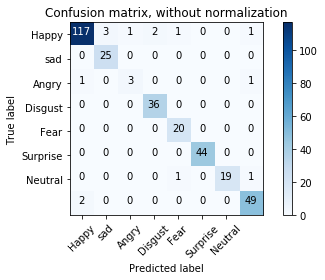

In [63]:
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


In [ ]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()